<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 3 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this assignment, we work with PySpark, which is the Python API for Apache Spark. It enables performing real-time, large-scale data processing in a distributed environment using Python.

In [1]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.types import StructType, StructField, FloatType, DateType, LongType
from pyspark.sql.functions import to_date,year,month,min,mean,stddev,col,current_date,count, desc ,asc ,split, explode, regexp_replace,row_number,concat,lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.window import Window
import numpy as np
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd

ModuleNotFoundError: No module named 'pyspark'

# Warm-Up!

In [3]:
def show_dataframe_info(df: DataFrame,num_of_rows=10):
    print("Schema:")
    df.printSchema()
    print(f"Number of Rows: {df.count()}")
    print("First Few Rows:")
    df.show(num_of_rows)  

## Question 1,2: Read & findout schema of data. 

In [4]:
spark = SparkSession.builder.getOrCreate()

schema = StructType([
    StructField("Date", DateType(), True),
    StructField("Open", FloatType(), True),
    StructField("High", FloatType(), True),
    StructField("Low", FloatType(), True),
    StructField("Close", FloatType(), True),
    StructField("Volume", LongType(), True),
    StructField("Adj Close", FloatType(), True)
])

df = spark.read.option("header", True).schema(schema).csv("stocks.csv")

show_dataframe_info(df,10)

24/04/20 19:12:16 WARN Utils: Your hostname, IdeaPad-5-15ITL05-55a06dec resolves to a loopback address: 127.0.1.1; using 172.20.10.12 instead (on interface wlp0s20f3)
24/04/20 19:12:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/20 19:12:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)

Number of Rows: 1762
First Few Rows:
+----------+---------+---------+---------+---------+---------+---------+
|      Date|     Open|     High|      Low|    Close|   Volume|Adj Close|
+----------+---------+---------+---------+---------+---------+---------+
|2010-01-04|   213.43|    214.5|   212.38|   214.01|123432400| 27.72704|
|2010-01-05|214.59999|   215.59|   213.25|214.37999|150476200|27.774977|
|2010-01-06|214.37999|   215.23|   210.75|   210.97|138040000|27.333178|
|2010-01-07|   211.75|    212.0|   209.05|   210.58|119282800| 27.28265|
|2010-01-08|210.29999|    212.0|   209.06|211.98001|111902700|27.464033|
|2010-01-11|    212.8|    213.0|208.45001|   210.11|115557400|27.221758|
|2010-01-12|   209.19|209.76999|   206.42|

## Question 3 : Select opening, closing and volume for record with closing less than 500

In [5]:
q3_df = df.where(df["Close"]<500).select("Open","Close","Volume")
show_dataframe_info(q3_df,30)

Schema:
root
 |-- Open: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)

Number of Rows: 1359
First Few Rows:
+---------+---------+---------+
|     Open|    Close|   Volume|
+---------+---------+---------+
|   213.43|   214.01|123432400|
|214.59999|214.37999|150476200|
|214.37999|   210.97|138040000|
|   211.75|   210.58|119282800|
|210.29999|211.98001|111902700|
|    212.8|   210.11|115557400|
|   209.19|   207.72|148614900|
|207.87001|210.65001|151473000|
|   210.11|   209.43|108223500|
|   210.93|   205.93|148516900|
|   208.33|   215.04|182501900|
|   214.91|   211.73|153038200|
|212.07999|208.06999|152038600|
|   206.78|   197.75|220441900|
|   202.51|   203.07|266424900|
|   205.95|   205.94|466777500|
|206.84999|   207.88|430642100|
|204.93001|   199.29|293375600|
|   201.08|   192.06|311488100|
|   192.37|   194.73|187469100|
|   195.91|   195.86|174585600|
|   195.17|   199.23|153832000|
|   196.73|   192.05|189413000|
|   192.63

## Question 4 : records with opening price more than 200 and closing price less than 200.

In [6]:
q4_df = df.filter((df["Open"] > 200) & (df["Close"] < 200))
show_dataframe_info(q4_df)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)

Number of Rows: 3
First Few Rows:
+----------+---------+-----+------+------+---------+---------+
|      Date|     Open| High|   Low| Close|   Volume|Adj Close|
+----------+---------+-----+------+------+---------+---------+
|2010-01-22|   206.78|207.5|197.16|197.75|220441900|25.620401|
|2010-01-28|204.93001|205.5| 198.7|199.29|293375600|25.819921|
|2010-01-29|   201.08|202.2|190.25|192.06|311488100|24.883207|
+----------+---------+-----+------+------+---------+---------+



## Question 5 : Extract the year from the date and save it in a new column.

In [7]:
q5_df = df.withColumn('year', year(df['Date']))
show_dataframe_info(q5_df)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- year: integer (nullable = true)

Number of Rows: 1762
First Few Rows:
+----------+---------+---------+---------+---------+---------+---------+----+
|      Date|     Open|     High|      Low|    Close|   Volume|Adj Close|year|
+----------+---------+---------+---------+---------+---------+---------+----+
|2010-01-04|   213.43|    214.5|   212.38|   214.01|123432400| 27.72704|2010|
|2010-01-05|214.59999|   215.59|   213.25|214.37999|150476200|27.774977|2010|
|2010-01-06|214.37999|   215.23|   210.75|   210.97|138040000|27.333178|2010|
|2010-01-07|   211.75|    212.0|   209.05|   210.58|119282800| 27.28265|2010|
|2010-01-08|210.29999|    212.0|   209.06|211.98001|111902700|27.464033|2010|
|2010-01-11|    212.8|    213.0|208.45

## Question 6 : show the minimum volumes traded for each year.

In [8]:
q6_df=q5_df.groupby("year").agg(min("Volume").alias("minVolume"))
q6_df.show()

+----+---------+
|year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



## Question 7 : Show the highest low price for each year and month

In [9]:
q7_df=q5_df.groupby(["year",month(df["Date"])]).agg(min("Volume").alias("minVolume"))
show_dataframe_info(q7_df,84)

Schema:
root
 |-- year: integer (nullable = true)
 |-- month(Date): integer (nullable = true)
 |-- minVolume: long (nullable = true)

Number of Rows: 84
First Few Rows:
+----+-----------+---------+
|year|month(Date)|minVolume|
+----+-----------+---------+
|2012|         10| 92681400|
|2010|          7|105137900|
|2010|         12| 39373600|
|2015|          2| 37362400|
|2014|          4| 40586000|
|2015|         12| 13570400|
|2016|          7| 23779900|
|2016|         11| 11475900|
|2012|          8| 48734700|
|2013|          2| 80628800|
|2012|          4|101680600|
|2012|         12| 43938300|
|2014|         10| 34187700|
|2016|          5| 28719100|
|2014|         12| 14479600|
|2013|          9| 57010100|
|2013|         10| 62775300|
|2014|          5| 39934300|
|2016|          2| 27582700|
|2013|         12| 41888700|
|2014|          1| 57319500|
|2010|         11| 59396400|
|2011|          3| 68504800|
|2013|          3| 73573500|
|2014|          8| 28116000|
|2013|          6| 

## Question 8 : Mean and standard deviation of high price over the whole data frame.

In [10]:
q8_df = df.agg(stddev("High").alias("Stddev High Price"),mean("High").alias("Mean High Price"))
show_dataframe_info(q8_df)

Schema:
root
 |-- Stddev High Price: double (nullable = true)
 |-- Mean High Price: double (nullable = true)

Number of Rows: 1
First Few Rows:
+-----------------+-----------------+
|Stddev High Price|  Mean High Price|
+-----------------+-----------------+
|186.8981766989906|315.9112879420788|
+-----------------+-----------------+



# Main Task

Each field in your Spotify Parquet dataset represents:

- **id**: The unique identifier for the track.
- **name**: The name of the track.
- **album**: The name of the album that the track is from.
- **album_id**: The unique identifier for the album.
- **artists**: The list of artists who performed the track.
- **artist_ids**: The unique identifiers for the artists.
- **track_number**: The track number on the album.
- **disc_number**: The number of the disc where the track is from (useful for albums that span multiple discs).
- **explicit**: Whether or not the track has explicit lyrics (true or false).
- **danceability**: A measure of how suitable the track is for dancing based on a combination of musical elements. The value is between 0 and 1, with 1 being the most danceable.
- **energy**: A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. The value is between 0 and 1.
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation.
- **loudness**: The overall loudness of the track in decibels (dB).
- **mode**: The modality of the track (major is represented by 1 and minor is 0).
- **speechiness**: The presence of spoken words in the track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value.
- **acousticness**: A confidence measure of whether the track is acoustic. The value is between 0 and 1.
- **instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- **liveness**: Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.
- **valence**: A measure of musical positiveness. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- **tempo**: The overall estimated tempo of the track in beats per minute (BPM).
- **duration_ms**: The duration of the track in milliseconds.
- **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **year**: The year the track was released.
- **release_date**: The date the track was released.

In [11]:
spotify_df = spark.read.parquet("spotify.parquet")
show_dataframe_info(spotify_df,5)

Schema:
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)

Number of Rows: 1204025
First

In [12]:

spotify_df = spotify_df.withColumn("artists", regexp_replace(regexp_replace("artists", "[\\[\\]]", ""), "'", ""))
spotify_df = spotify_df.withColumn("artists_array", split("artists", ", "))
spotify_df = spotify_df.withColumn("artist", explode("artists_array"))
spotify_df = spotify_df.drop("artists_array")
show_dataframe_info(spotify_df,5)

Schema:
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)
 |-- artist: string (nullable 

Number of Rows: 1807705
First Few Rows:
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------+---+------------------+----+-----------+------------+----------------+--------+-------+-------+-----------+--------------+----+------------+--------------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|danceability|energy|key|          loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|time_signature|year|release_date|              artist|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------+---+------------------+----+-----------+------------+----------------+--------+-------+------

In [13]:
def print_missing_percentages(df):
    total_rows = df.count()
    
    missing_values = {}

    for col in df.columns:
        missing_count = df.filter(df[col].isNull()).count()
        
        missing_percentage = (missing_count / total_rows) * 100
        
        missing_values[col] = {"count": missing_count, "percentage": missing_percentage}

    for col, values in missing_values.items():
        print(f"{col}: {values['count']} missing values ({values['percentage']}%)")

In [46]:
print_missing_percentages(spotify_df)

id: 0 missing values (0.0%)
name: 5 missing values (0.00027659380263925806%)
album: 13 missing values (0.000719143886862071%)
album_id: 0 missing values (0.0%)
artists: 0 missing values (0.0%)
artist_ids: 0 missing values (0.0%)
track_number: 0 missing values (0.0%)
disc_number: 0 missing values (0.0%)
explicit: 0 missing values (0.0%)
danceability: 0 missing values (0.0%)
energy: 0 missing values (0.0%)
key: 0 missing values (0.0%)
loudness: 0 missing values (0.0%)
mode: 0 missing values (0.0%)
speechiness: 0 missing values (0.0%)
acousticness: 0 missing values (0.0%)
instrumentalness: 0 missing values (0.0%)
liveness: 0 missing values (0.0%)
valence: 0 missing values (0.0%)
tempo: 0 missing values (0.0%)
duration_ms: 0 missing values (0.0%)
time_signature: 0 missing values (0.0%)
year: 0 missing values (0.0%)
release_date: 0 missing values (0.0%)
artist: 0 missing values (0.0%)


In [ ]:
spotify_df = spotify_df.dropDuplicates(['id'])
spotify_df=spotify_df.na.drop()
print_missing_percentages(spotify_df)

In [15]:
current_year = year(current_date())
spotify_df = spotify_df.withColumn('song_age', current_year - col('year'))

In [16]:
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
stats = spotify_df.select(numerical_cols).describe()
stats.show()

24/04/20 19:12:50 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+
|summary|       danceability|            energy|           loudness|        speechiness|      acousticness|   instrumentalness|           liveness|           valence|             tempo|
+-------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+
|  count|            1204012|           1204012|            1204012|            1204012|           1204012|            1204012|            1204012|           1204012|           1204012|
|   mean|0.49305474667195914|0.5095331699034589|-11.808764621116776|0.08438146264322845|0.4467552356258591|0.28285951933417913|0.20159918035700355|0.4279832420092153|117.63406458490444|
| stddev|0.18966926721910754|0.2946836478121518|  6.982140706446403| 0

### number of unique artist

In [17]:
spotify_df.select("artist").distinct().count()

83589

In [18]:
def top_n_items(df, group_column, n=20):
    item_counts = df.groupby(group_column).agg(count('*').alias('song_count'))
    item_counts = item_counts.orderBy(desc('song_count'))
    top_n_items = item_counts.limit(n)
    top_n_items.show()

### 20 singer with most songs 

In [19]:
top_n_items(spotify_df, 'artist')

+--------------------+----------+
|              artist|song_count|
+--------------------+----------+
|Johann Sebastian ...|      9473|
|Ludwig van Beethoven|      5710|
|Wolfgang Amadeus ...|      3768|
|George Frideric H...|      3008|
|     Antonio Vivaldi|      2851|
|  Franz Joseph Haydn|      2239|
|    Sergei Prokofiev|      2092|
|Pyotr Ilyich Tcha...|      2036|
|     Johannes Brahms|      2035|
|     Various Artists|      2027|
|     Frédéric Chopin|      2024|
| Dmitri Shostakovich|      1952|
|      Franz Schubert|      1804|
|     Robert Schumann|      1693|
|Vitamin String Qu...|      1578|
|         Traditional|      1575|
|      Claude Debussy|      1461|
|The City of Pragu...|      1387|
|Georg Philipp Tel...|      1338|
|   Felix Mendelssohn|      1313|
+--------------------+----------+



### 20 albums with most songs

In [20]:
top_n_items(spotify_df, 'album')

+--------------------+----------+
|               album|song_count|
+--------------------+----------+
|       Greatest Hits|      1800|
|                Live|       872|
|      The Collection|       343|
|          Love Songs|       337|
|          Super Hits|       330|
|Platinum & Gold C...|       300|
|         The Best Of|       280|
|RCA 100 Años de M...|       280|
|                  II|       278|
|     Handel: Messiah|       268|
|             Best Of|       255|
|The Definitive Co...|       249|
|                Home|       240|
|                 One|       230|
|                 III|       227|
|16 Most Requested...|       224|
|                Rise|       202|
|Live at Billy Bob...|       196|
|                Gold|       184|
|         Full Circle|       184|
+--------------------+----------+



### top 20 release date

In [21]:
top_n_items(spotify_df, 'release_date')

+------------+----------+
|release_date|song_count|
+------------+----------+
|  2007-01-01|     12631|
|  2008-01-01|     11071|
|  2006-01-01|     10753|
|  2005-01-01|      9328|
|  2000-01-01|      8812|
|  2003-01-01|      8473|
|  2004-01-01|      8387|
|        2001|      7237|
|        2000|      6935|
|        2003|      6786|
|  2002-01-01|      6597|
|        2002|      6475|
|  2001-01-01|      6090|
|        2004|      5978|
|        2005|      5595|
|        1999|      5224|
|        2006|      4853|
|        1996|      4764|
|        1998|      4693|
|        1997|      4600|
+------------+----------+



As you can see, many records lack an exact release date, with only the year of release provided. Additionally, numerous songs are released on the first day of the year. This seems somewhat erroneous. It's possible that for songs lacking a month and day of release, they have been filled in with January 1st, which may not be logical.

### top 20 artists with most songs published in a year.

In [22]:
artist_year_counts = spotify_df.groupby(['year', 'artists']).agg(count('*').alias('song_count'))
artist_year_counts = artist_year_counts.orderBy(desc('song_count'))
top_n_artists_by_year = artist_year_counts.limit(20)
top_n_artists_by_year.show()

+----+--------------------+----------+
|year|             artists|song_count|
+----+--------------------+----------+
|2013|"Dan Gibsons Soli...|       906|
|2007|        The Hit Crew|       533|
|2016|        Circle Music|       480|
|2013|         Sing n Play|       364|
|2007|           Tori Amos|       332|
|1995|Edvard Grieg, Ein...|       316|
|2016|Revolt Production...|       279|
|2002|     Various Artists|       267|
|2019|     Grant Macdonald|       260|
|2003|Vitamin String Qu...|       257|
|2005|       Ralph Stanley|       256|
|2016|          Bob Shafto|       255|
|2018|      Grace Brancale|       255|
|2006|     William Verkler|       255|
|2019|   League of Legends|       242|
|1999|Frédéric Chopin, ...|       224|
|2017|Revolt Production...|       215|
|2014|         Howard Zinn|       212|
|1996|      Alla Pugacheva|       211|
|2008|   Cumbia Latin Band|       209|
+----+--------------------+----------+



In [23]:
spotify_df_filtered = spotify_df.filter(spotify_df['year'] != 0)
spotify_df_filtered.count()

1204002

In [24]:
oldest_song = spotify_df_filtered.orderBy(asc('year')).first()

print("Oldest Song:")
print("Name:", oldest_song['name'])
print("Artist:", oldest_song['artists'])
print("Year:", oldest_song['year'])

Oldest Song:
Name: Nashwa
Artist: Rabih Abou-Khalil
Year: 1900


### Correlation heatmap for numerical values

24/04/20 19:20:05 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


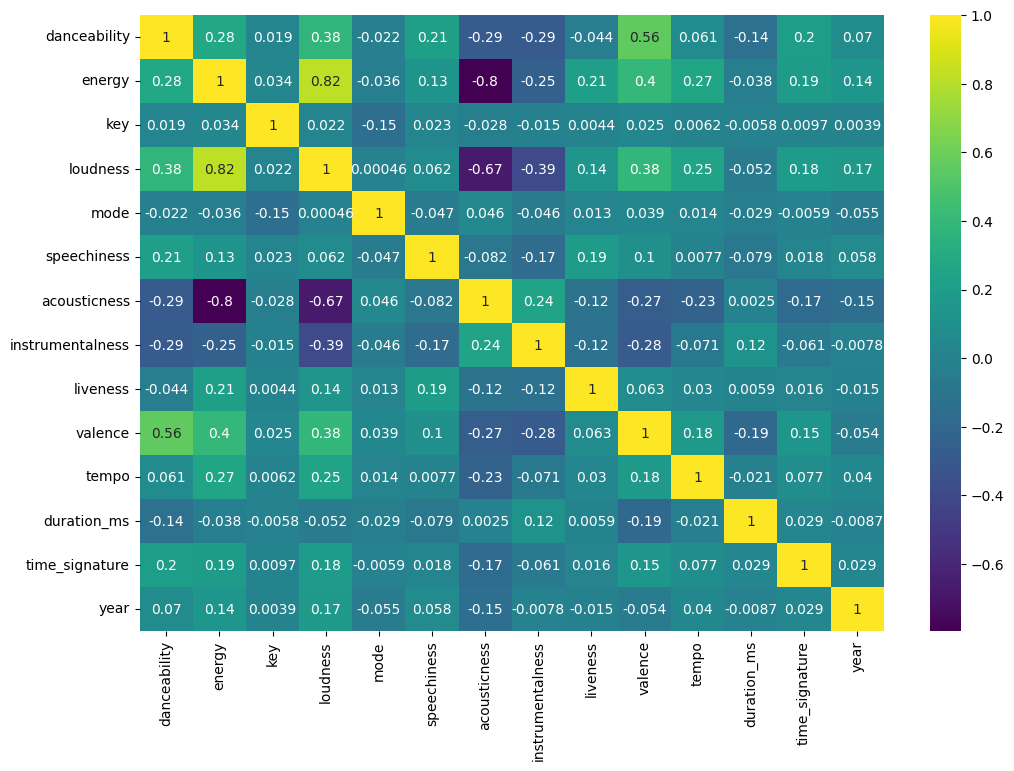

In [26]:
num_cols = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness","instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "year"]

assembler = VectorAssembler(inputCols=num_cols, outputCol="features")
df_vector = assembler.transform(spotify_df).select("features")

matrix = Correlation.corr(df_vector, "features")

corr_matrix = matrix.collect()[0]["pearson(features)"].toArray()

corr_matrix = np.reshape(corr_matrix, (len(num_cols), len(num_cols)))

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', xticklabels=num_cols, yticklabels=num_cols)
plt.show()

From the correlation coefficients provided, we can understand several things about the relationships between the musical characteristics:

1. **Positive Correlation between Danceability and Loudness:** Danceability and loudness have a positive correlation coefficient of 0.38. This suggests that songs with higher danceability tend to have higher loudness.
2. **Negative Correlation between Danceability and Acousticness/Instrumentalness:** Danceability has negative correlations with acousticness (-0.29) and instrumentalness (-0.29). This indicates that songs with higher danceability tend to have lower acousticness and instrumentalness.
3. **Positive Correlation between Energy and Loudness/Valence:** Energy is positively correlated with loudness `(0.82)` and valence (0.4). This implies that songs with higher energy levels tend to be louder and have higher valence (positivity or happiness).
4. **Negative Correlation between Energy and Acousticness:** Energy has a strong negative correlation with acousticness `(-0.8)`. This suggests that energetic songs are less likely to be acoustic.
5. **Positive Correlation between Loudness and Valence:** Loudness and valence have a positive correlation coefficient of 0.38. This means that songs with higher loudness tend to have higher valence.
6. **Negative Correlation between Loudness and Acousticness/Instrumentalness:** Loudness is negatively correlated with both acousticness `(-0.67)` and instrumentalness (-0.393). This indicates that louder songs are less likely to be acoustic or instrumental.
7. **Positive Correlation between Acousticness and Valence:** Acousticness and valence have a negative correlation coefficient of -0.27. This suggests that acoustic songs are more likely to have lower valence.

In [27]:
songs_by_year = spotify_df_filtered.groupby('year').agg(count('*').alias('song_count')).orderBy('year')

songs_by_year_list = songs_by_year.collect()

years = [row['year'] for row in songs_by_year_list]
song_counts = [row['song_count'] for row in songs_by_year_list]


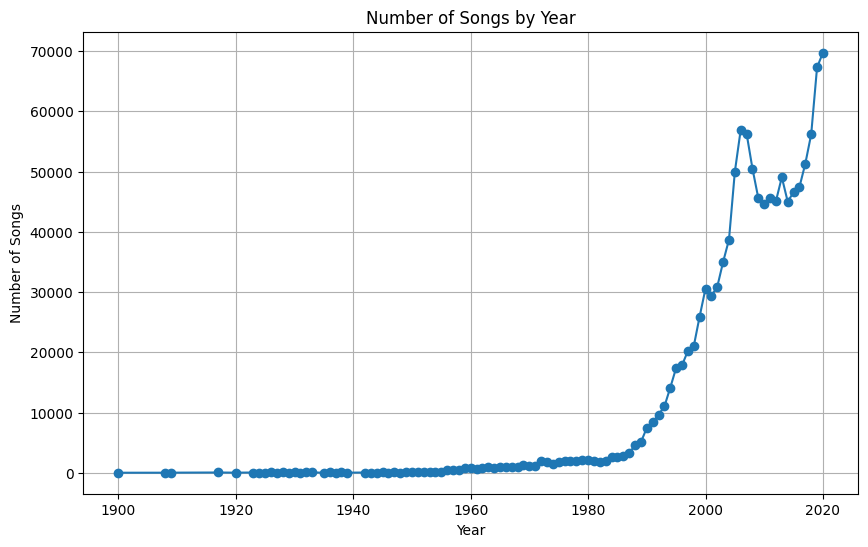

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(years, song_counts, marker='o', linestyle='-')
plt.title('Number of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

**Rise in Music:** : There’s a noticeable increase in the number of songs starting from the 1960s, with an overall upward trend despite some fluctuations.


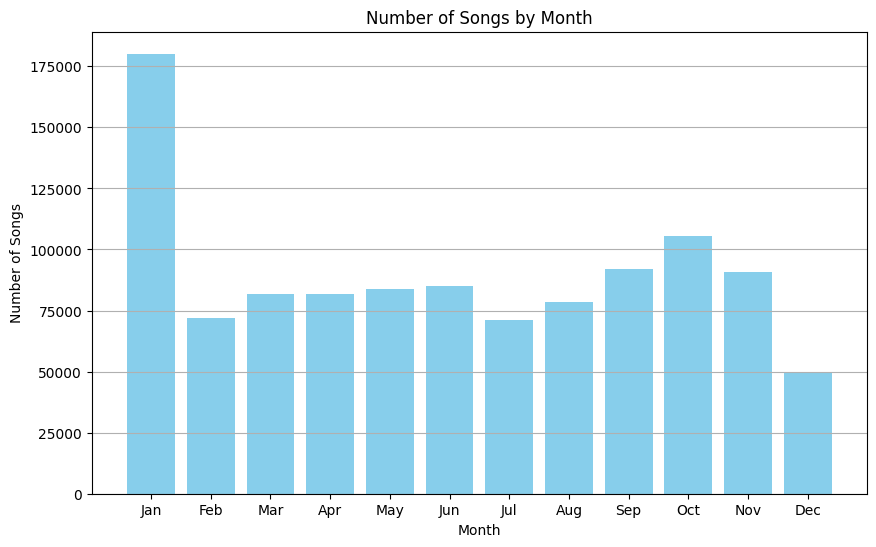

In [29]:
modified_spotify_df = spotify_df.withColumn('release_date', to_date(spotify_df['release_date'], 'yyyy-MM-dd'))

modified_spotify_df = modified_spotify_df.withColumn('release_month', month('release_date'))
modified_spotify_df = modified_spotify_df.filter(modified_spotify_df['release_month'].isNotNull())

songs_by_month = modified_spotify_df.groupby('release_month').agg(count('*').alias('song_count')).orderBy('release_month')
songs_by_month_list = songs_by_month.collect()

months = [row['release_month'] for row in songs_by_month_list]
song_counts = [row['song_count'] for row in songs_by_month_list]

plt.figure(figsize=(10, 6))
plt.bar(months, song_counts, color='skyblue')
plt.title('Number of Songs by Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


January has the highest number of songs released, suggesting that this month might be strategically important for the industry.

### Explicit vs non-Explicit

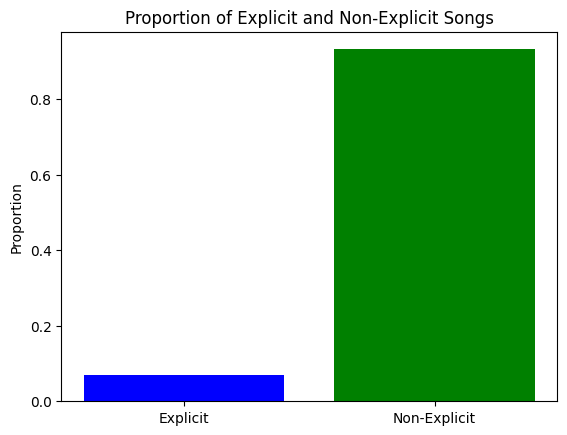

In [30]:
explicit_counts = spotify_df.filter(spotify_df['explicit'] == True).count()
non_explicit_counts = spotify_df.filter(spotify_df['explicit'] == False).count()

total_songs = explicit_counts + non_explicit_counts
explicit_proportion = explicit_counts / total_songs
non_explicit_proportion = non_explicit_counts / total_songs

labels = ['Explicit', 'Non-Explicit']
proportions = [explicit_proportion, non_explicit_proportion]

plt.bar(labels, proportions, color=['blue', 'green'])
plt.title('Proportion of Explicit and Non-Explicit Songs')
plt.ylabel('Proportion')
plt.show()

### Trends of music charachteristics in years

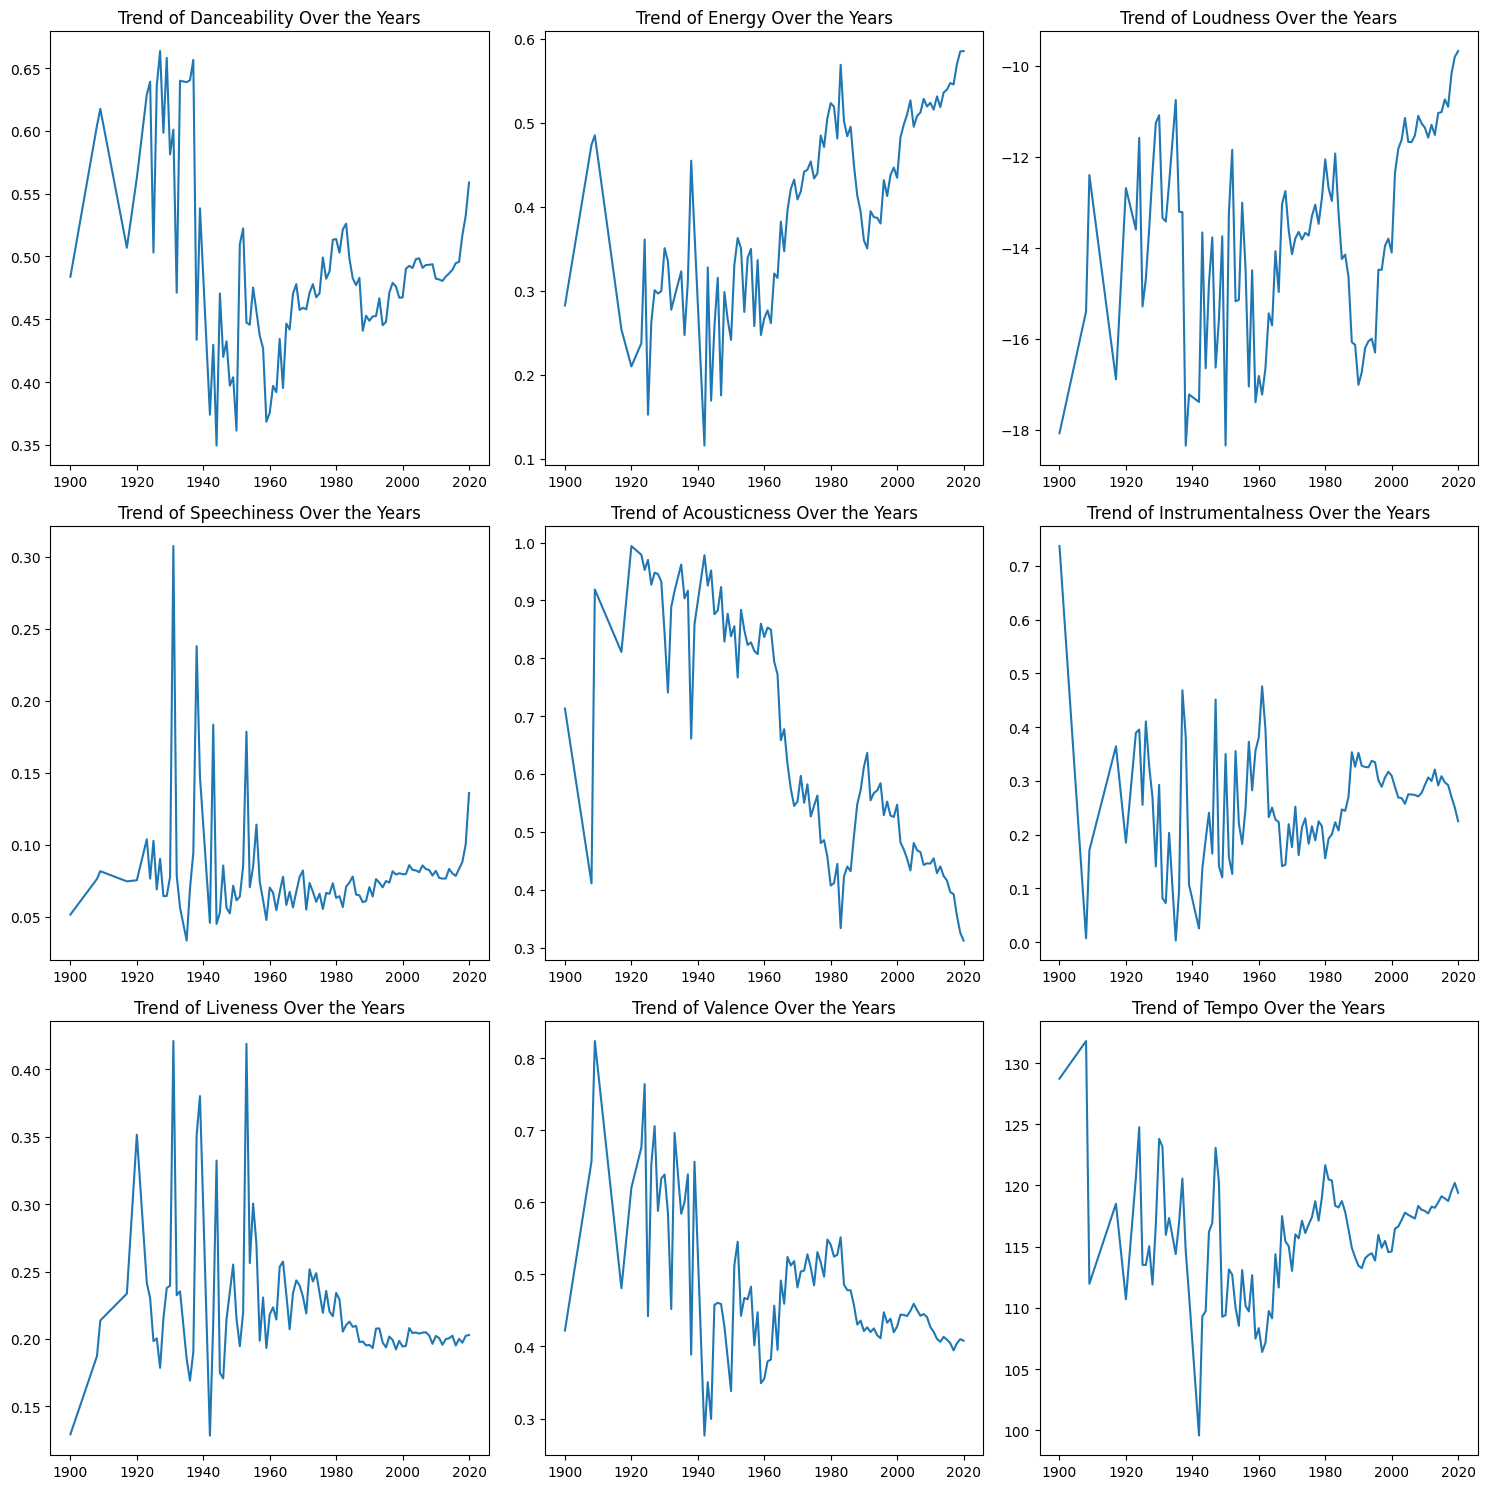

In [31]:
def plot_attribute_trends(attribute, ax):
    attribute_avg = spotify_df_filtered.groupby('year').agg(mean(attribute).alias(attribute)).orderBy('year')

    data = [(row['year'], row[attribute]) for row in attribute_avg.collect()]
    sns.lineplot(x=[x[0] for x in data], y=[x[1] for x in data], ax=ax)
    ax.set_title(f'Trend of {attribute.capitalize()} Over the Years')


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

attributes = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i, ax in enumerate(axs.flat):
    if i < len(attributes):
        plot_attribute_trends(attributes[i], ax)

plt.tight_layout()
plt.show()


### efect of world war in songs

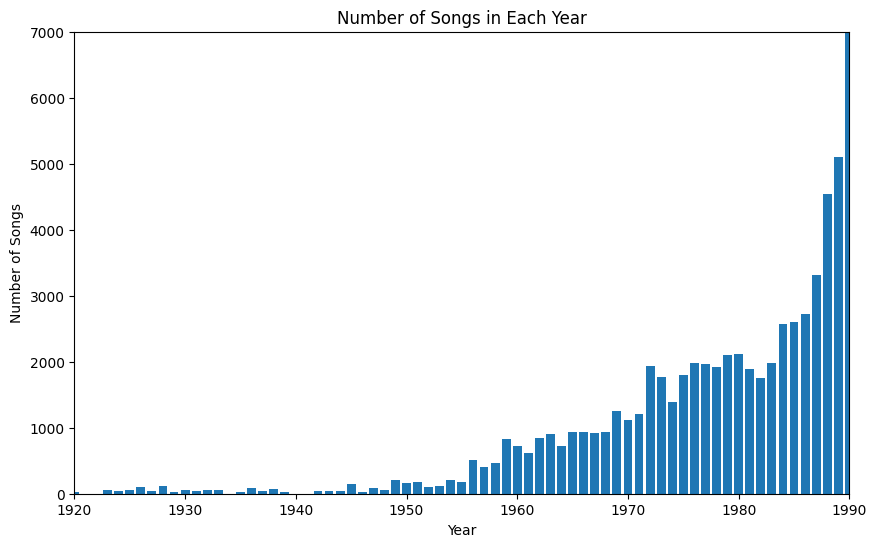

In [32]:
song_counts = spotify_df.groupBy('year').count().orderBy('year')

song_counts_pd = song_counts.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(song_counts_pd['year'], song_counts_pd['count'])
plt.xlim(1920 , 1990)
plt.ylim(0 , 7000)
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in Each Year')
plt.show()

### top 5 artist of each year

In [38]:
window = Window.partitionBy('year').orderBy(desc('count'))

artist_counts = spotify_df_filtered.groupBy('year', 'artist').count()
ranked_artists = artist_counts.withColumn('rank', row_number().over(window))

top_artists_each_year = ranked_artists.filter(ranked_artists['rank'] <= 5)

top_artists_each_year.show()


+----+--------------------+-----+----+
|year|              artist|count|rank|
+----+--------------------+-----+----+
|1900|   Rabih Abou-Khalil|   14|   1|
|1908|           Lovie Lee|    4|   1|
|1908|         Lacy Gibson|    4|   2|
|1908|Scotty And The Ri...|    4|   3|
|1908|           A.C. Reed|    4|   4|
|1908|   Sons of the Blues|    3|   5|
|1909|  Lecuona Cuban Boys|    3|   1|
|1909|    Sexteto Nacional|    3|   2|
|1909|Augusto Coén & Hi...|    2|   3|
|1909|Alberto Socarrás ...|    2|   4|
|1909|   "Antobals Cubans"|    2|   5|
|1917|     Igor Stravinsky|    3|   1|
|1917|      Duke Ellington|    2|   2|
|1917|       Maurice Ravel|    2|   3|
|1917|         Miles Davis|    2|   4|
|1917|     Ornette Coleman|    1|   5|
|1920|Mamie Smith & Her...|   17|   1|
|1920|         Mamie Smith|    8|   2|
|1923|Louis Armstrong &...|   13|   1|
|1923|Louis Armstrong &...|    6|   2|
+----+--------------------+-----+----+
only showing top 20 rows



In [39]:
key_histogram = spotify_df.groupBy("key").agg(count("*").alias("frequency"))

key_histogram.show()

+---+---------+
|key|frequency|
+---+---------+
|  0|   149566|
|  7|   155381|
|  6|    63502|
|  9|   133270|
|  5|   100005|
|  1|    96352|
| 10|    77162|
|  3|    39776|
|  8|    65348|
| 11|    81455|
|  2|   144583|
|  4|    97612|
+---+---------+



In [43]:
df_new = spotify_df_filtered.select('key', 'year', 'mode')
df_new.show(5 , vertical=True , truncate=False)

-RECORD 0----
 key  | 10   
 year | 2001 
 mode | 0    
-RECORD 1----
 key  | 0    
 year | 2014 
 mode | 1    
-RECORD 2----
 key  | 2    
 year | 1982 
 mode | 1    
-RECORD 3----
 key  | 9    
 year | 2004 
 mode | 0    
-RECORD 4----
 key  | 9    
 year | 2020 
 mode | 1    
only showing top 5 rows



### analysing keys and modes of each year


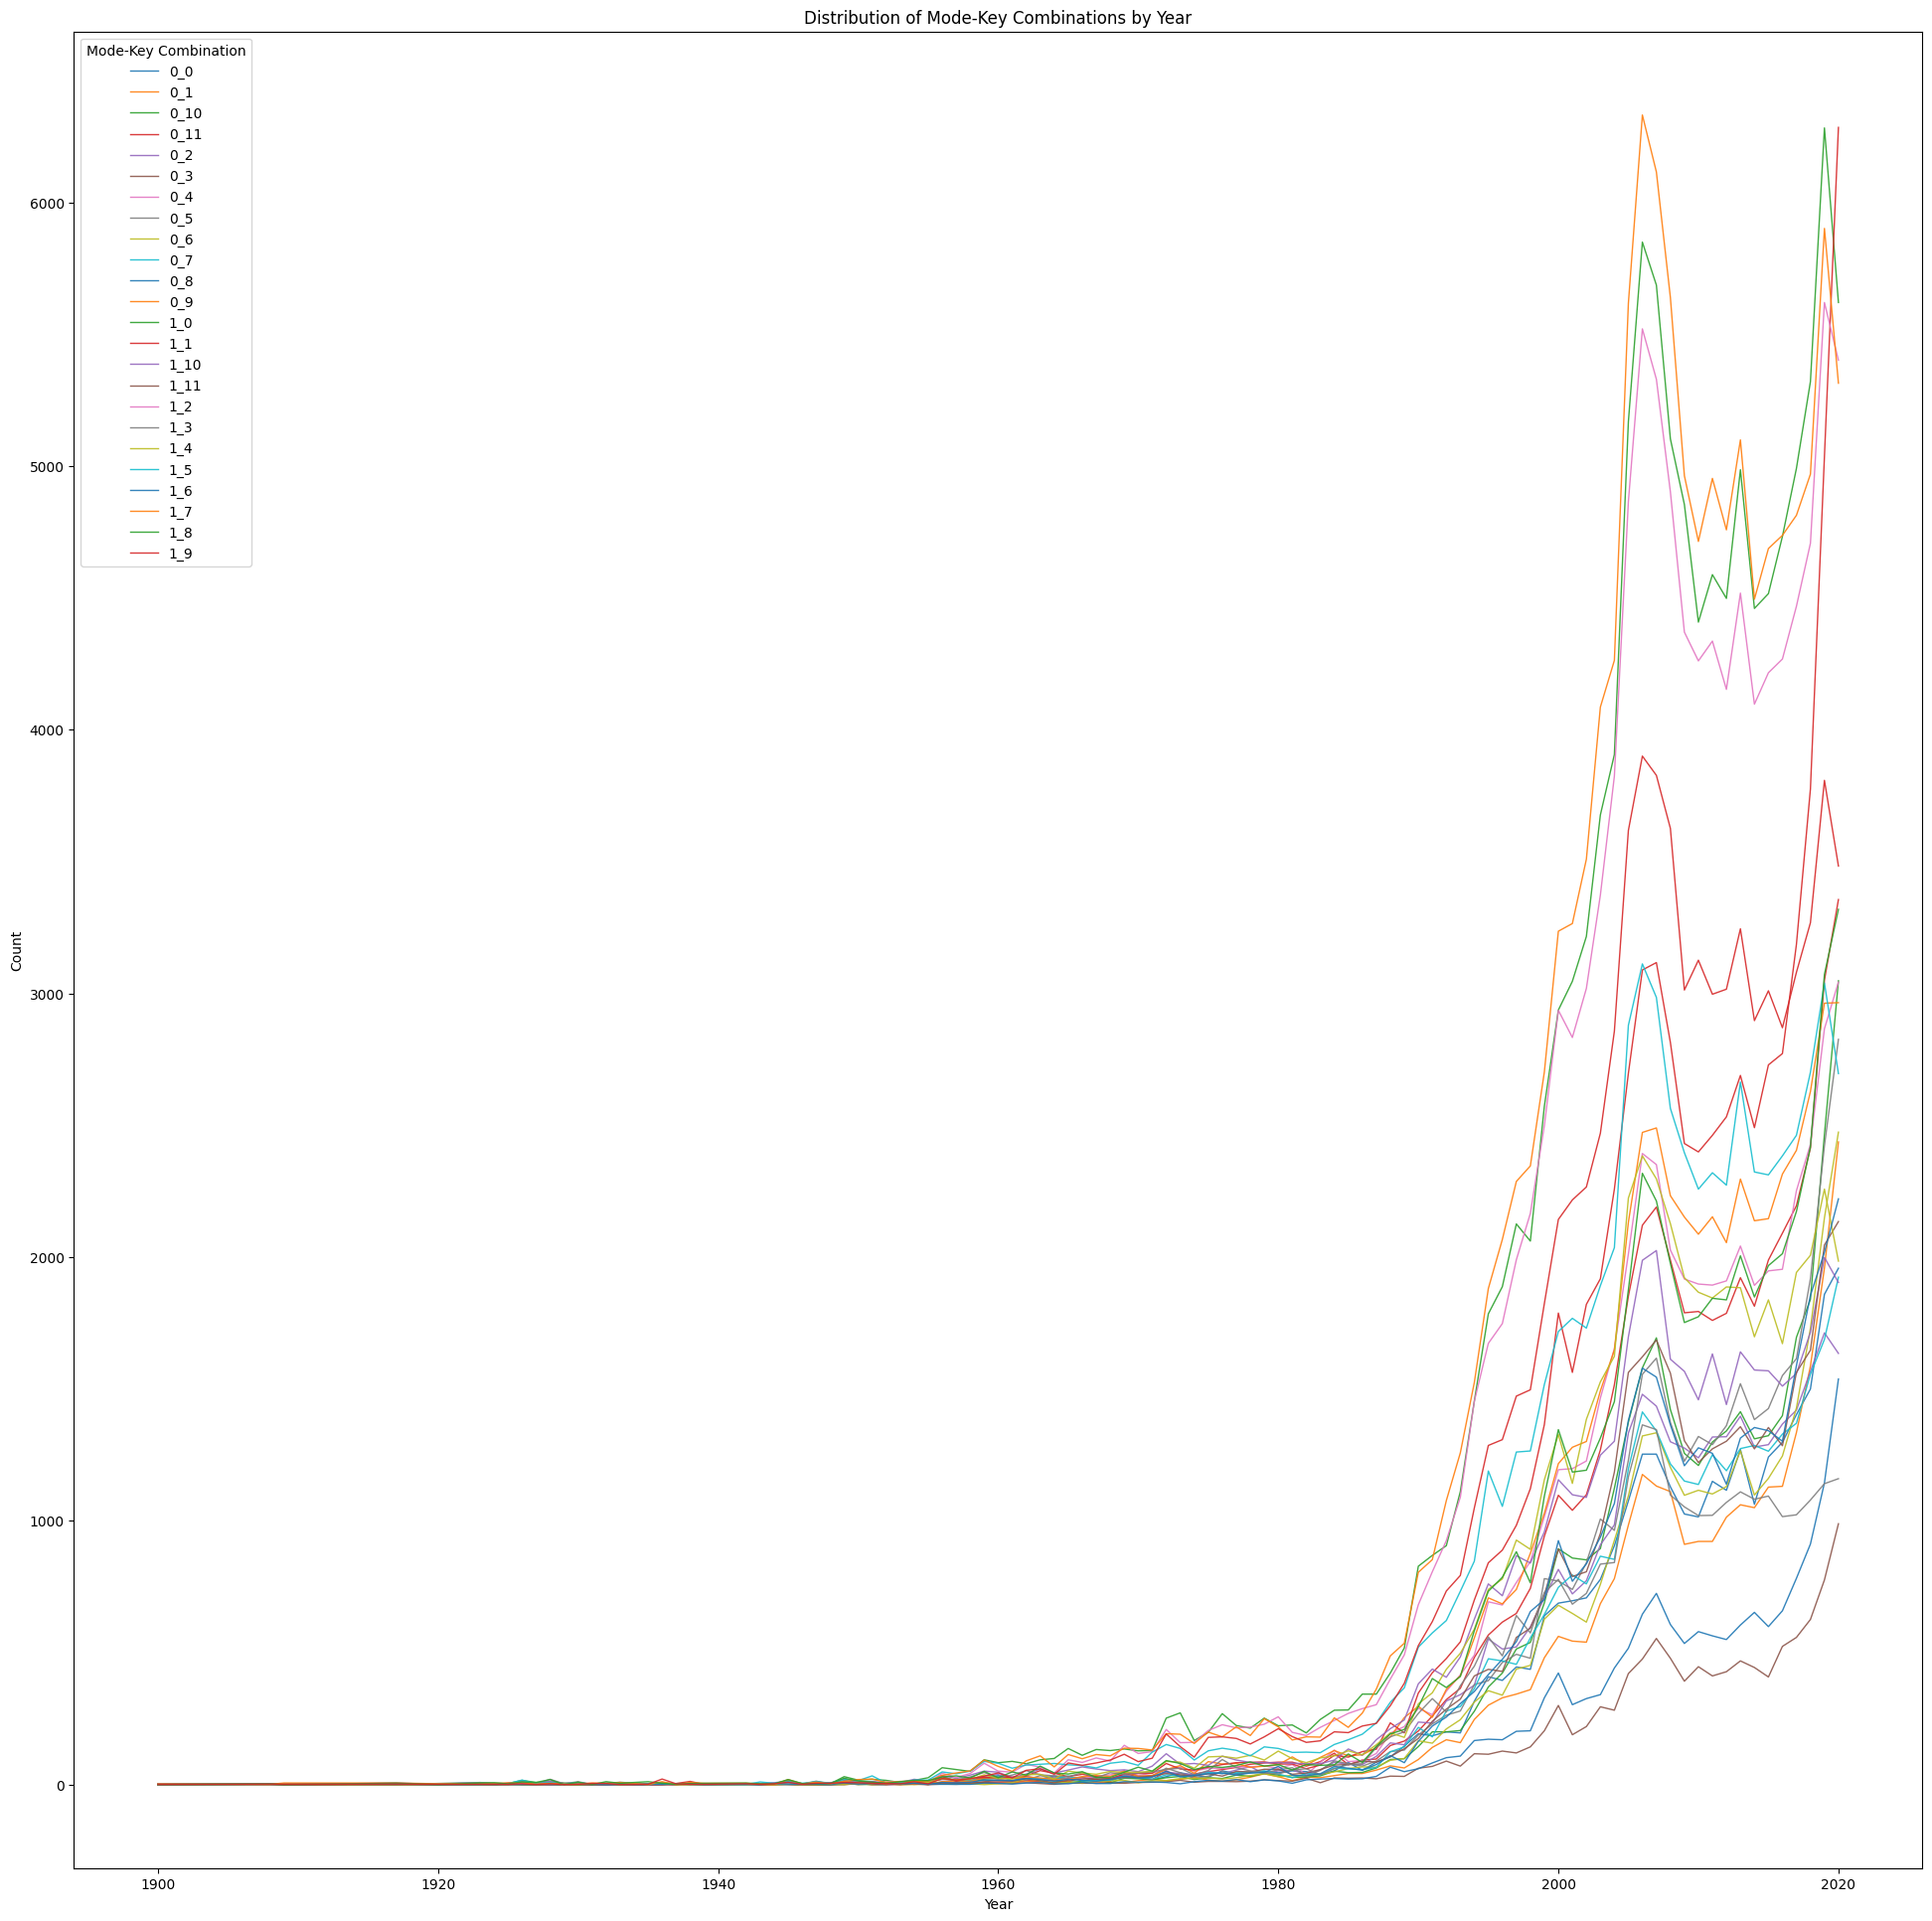

In [44]:
df_new = df_new.withColumn('mode_key', concat(col('mode'), lit('_'), col('key')))

mode_key_counts = df_new.groupBy('year', 'mode_key').count()

mode_key_counts_collected = mode_key_counts.collect()

data = {(row['year'], row['mode_key']): row['count'] for row in mode_key_counts_collected}
years = sorted(set(year for year, mode_key in data.keys()))
mode_keys = sorted(set(mode_key for year, mode_key in data.keys()))

plt.figure(figsize=(24, 24))

for mode_key in mode_keys:
    counts = [data.get((year, mode_key), 0) for year in years]
    plt.plot(years, counts, marker='', linewidth=1, alpha=0.9, label=mode_key)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Mode-Key Combinations by Year')
plt.legend(title='Mode-Key Combination')
plt.show()


we ca cunduct from this plot that wich key was more popular to write songs on, for in late 1970's the value of 0-10 is the highest, wich 0 is the mode(mapping to `major` or `minor`) and 10 being the key that will be mapped aswell, for example it could be `A# Major`.

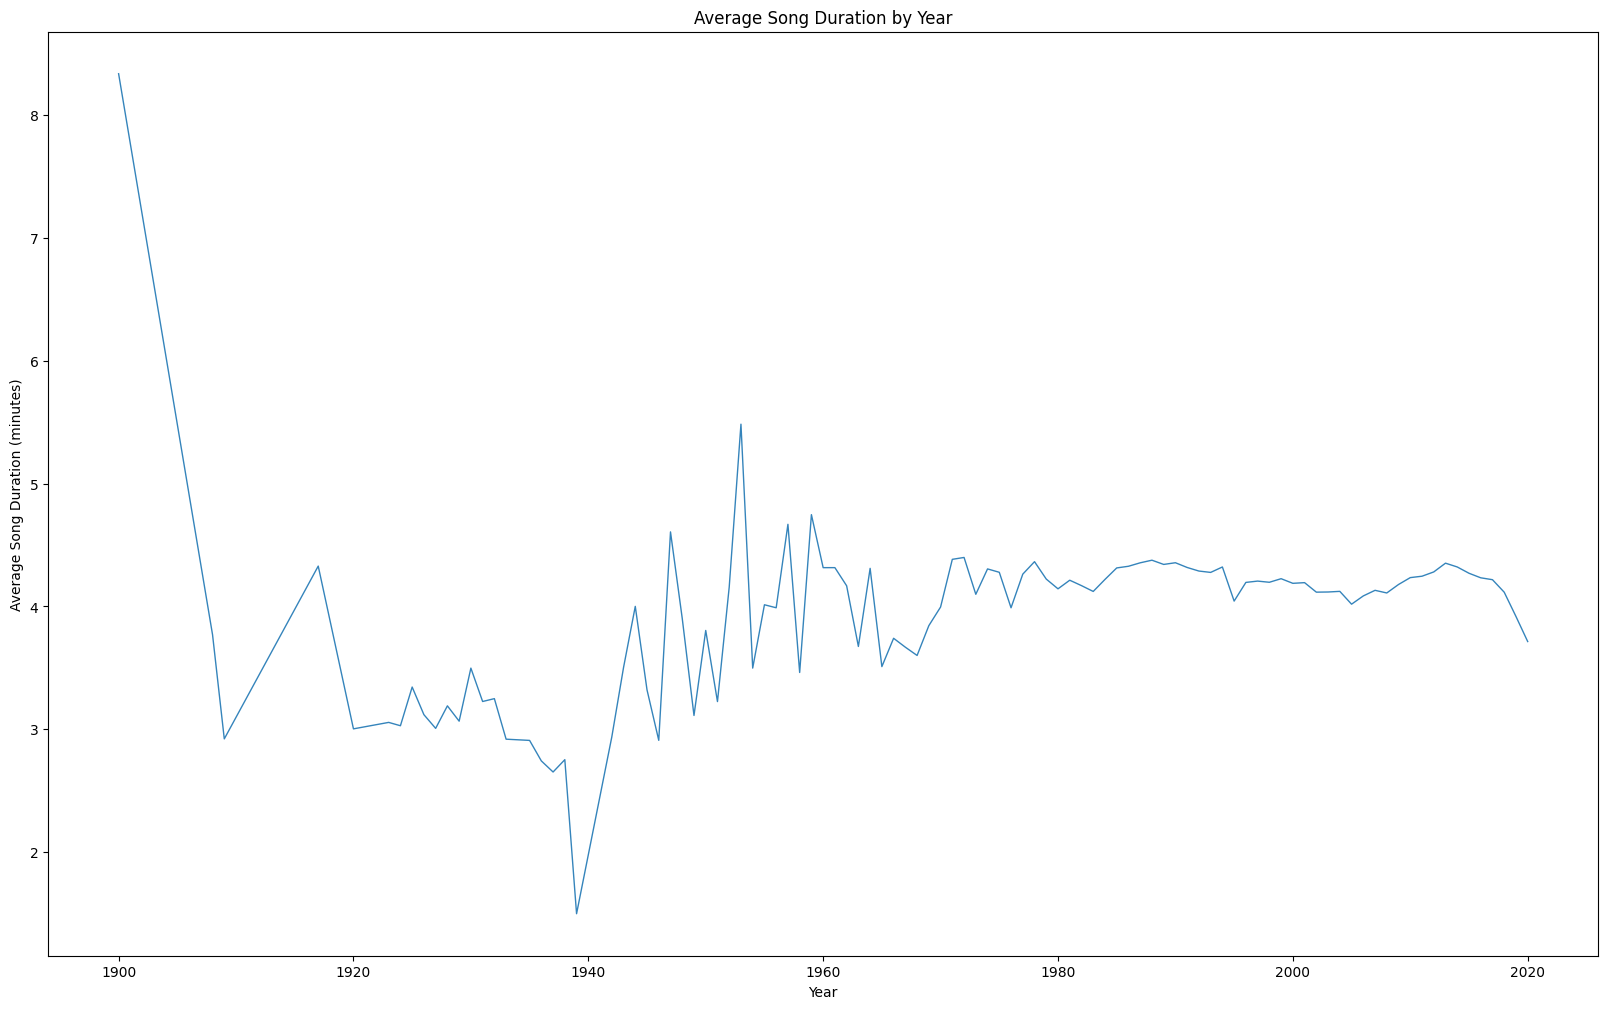

In [46]:
spotify_df = spotify_df_filtered.withColumn('duration_min', col('duration_ms') / 60000)
duration_avg = spotify_df.groupBy('year').avg('duration_min')
duration_avg_collected = duration_avg.collect()

data = {row['year']: row['avg(duration_min)'] for row in duration_avg_collected}
years = sorted(data.keys())

plt.figure(figsize=(20, 12))
plt.plot(years, [data[year] for year in years], marker='', linewidth=1, alpha=0.9)
plt.xlabel('Year')
plt.ylabel('Average Song Duration (minutes)')
plt.title('Average Song Duration by Year')
plt.show()

we can see from this plot that people prefered longer songs in the past, and it went downhill. in current times, we see that its pretty stable and around 4 minutes long.

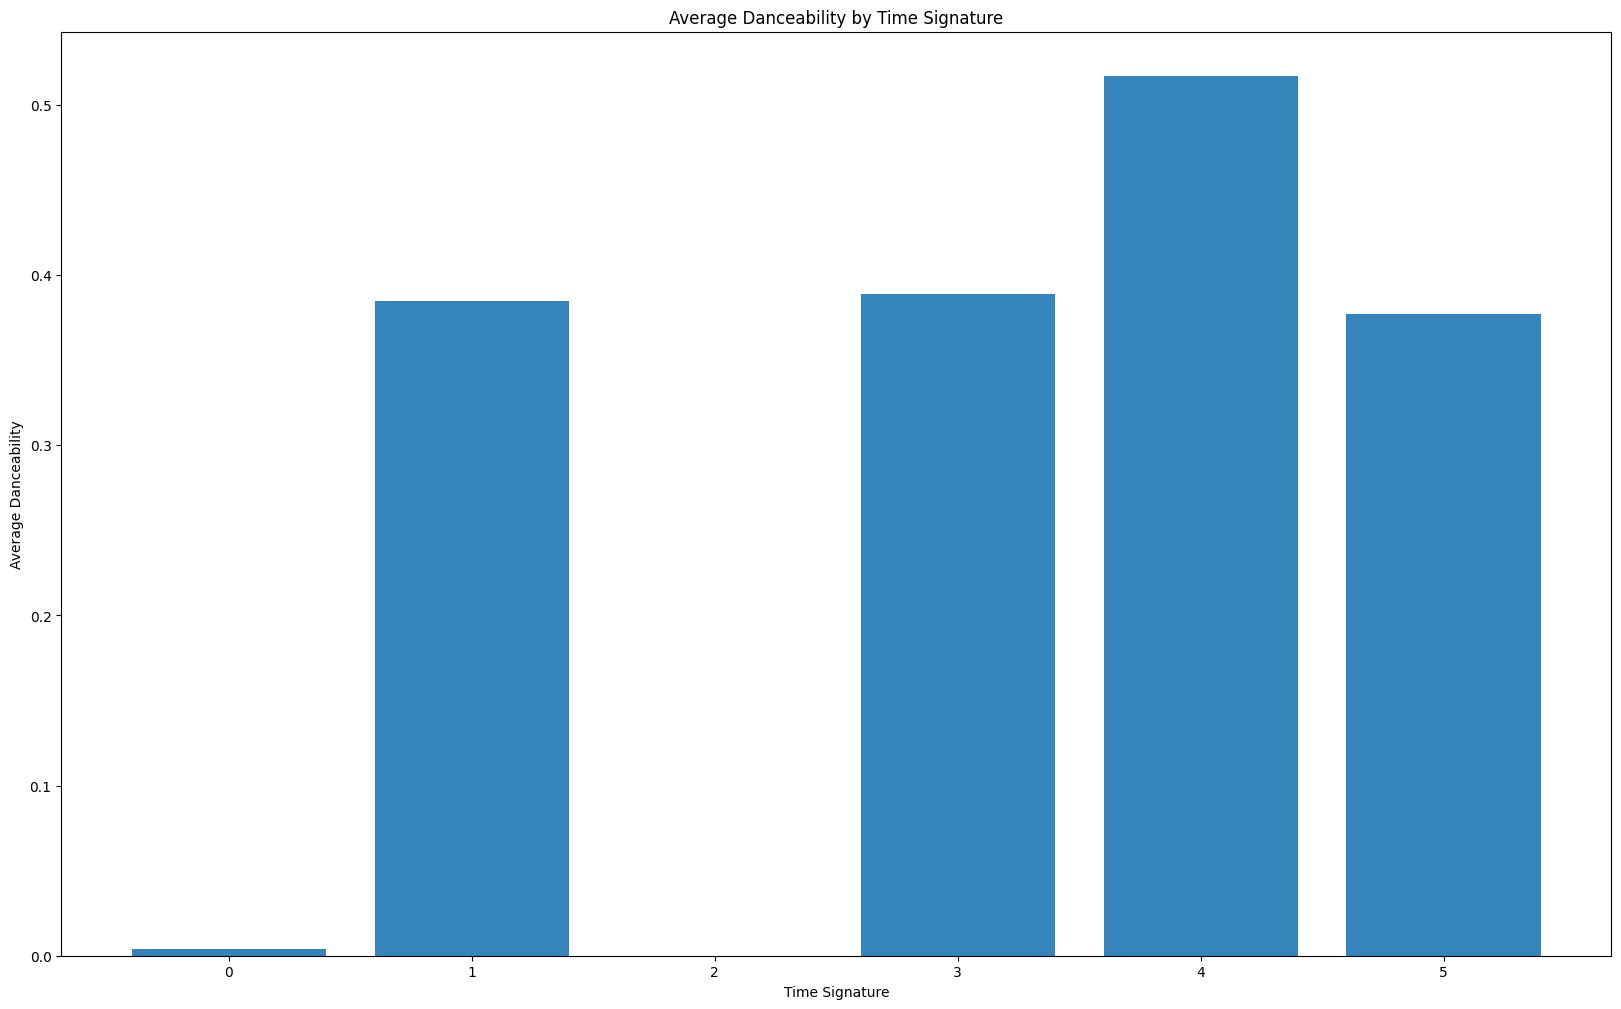

In [47]:
danceability_avg = spotify_df.groupBy('time_signature').avg('danceability')

danceability_avg_collected = danceability_avg.collect()

data = {row['time_signature']: row['avg(danceability)'] for row in danceability_avg_collected}
time_signatures = sorted(data.keys())

plt.figure(figsize=(20, 12))
plt.bar(time_signatures, [data[ts] for ts in time_signatures], alpha=0.9)

plt.xlabel('Time Signature')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Time Signature')
plt.show()


in this plot we see the average dancability by time signature. we're guessing the time signatures from the data that is from 0 to 5 is actually the amount of notes in the quarter note formula like 3/4 and 4/4. meaning from this plot that the dancability of 4/4 time signature is the highest following by 3/4 then 5/4. so writing songs in 4/4 can be a good way to make it more dancable. 

24/04/20 22:53:22 WARN MemoryStore: Not enough space to cache rdd_5423_6 in memory! (computed 12.0 MiB so far)
24/04/20 22:53:22 WARN BlockManager: Persisting block rdd_5423_6 to disk instead.
24/04/20 22:53:22 WARN MemoryStore: Not enough space to cache rdd_5423_3 in memory! (computed 12.0 MiB so far)
24/04/20 22:53:22 WARN BlockManager: Persisting block rdd_5423_3 to disk instead.
24/04/20 22:53:22 WARN MemoryStore: Not enough space to cache rdd_5423_1 in memory! (computed 12.0 MiB so far)
24/04/20 22:53:22 WARN BlockManager: Persisting block rdd_5423_1 to disk instead.
24/04/20 22:56:49 WARN MemoryStore: Not enough space to cache rdd_5663_3 in memory! (computed 12.0 MiB so far)
24/04/20 22:56:49 WARN BlockManager: Persisting block rdd_5663_3 to disk instead.


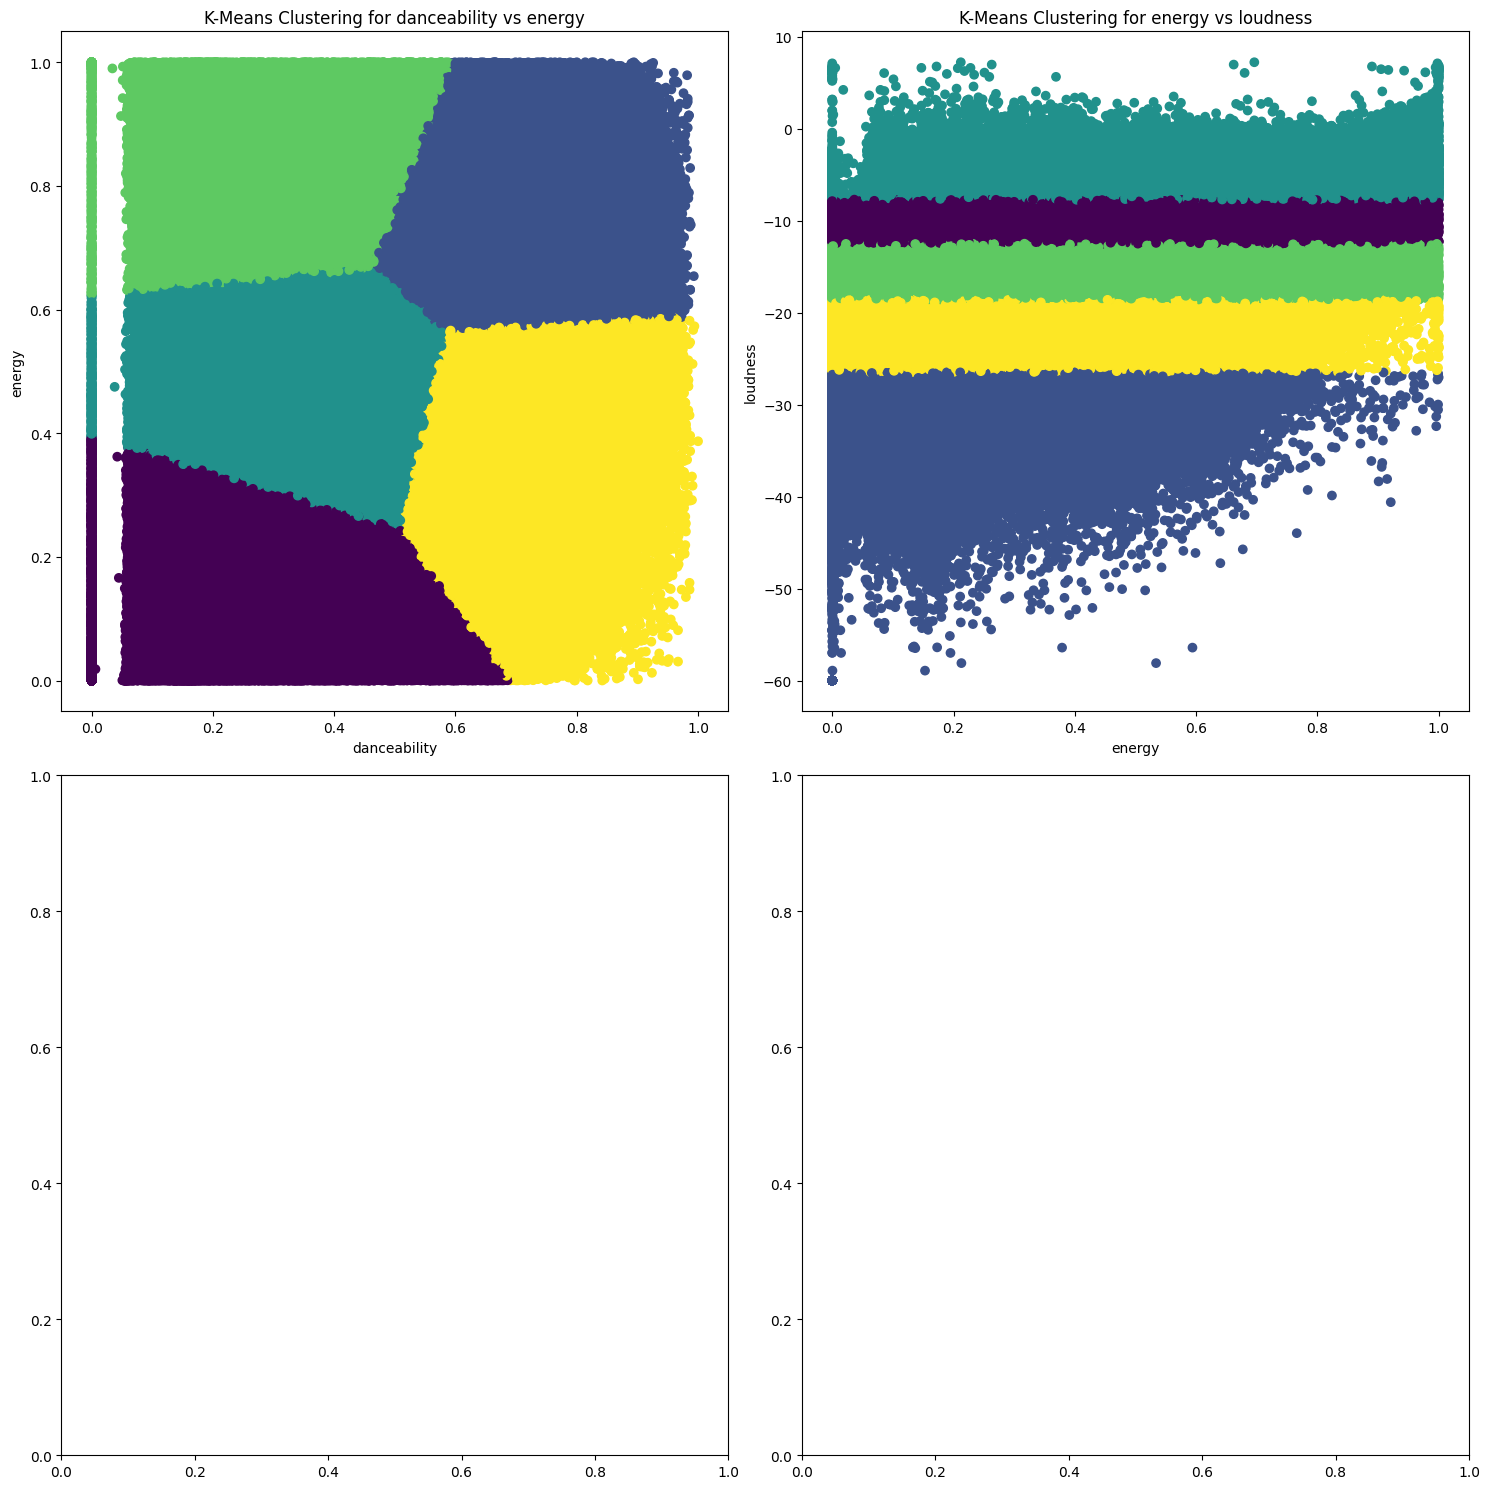

In [73]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

def train_and_visualize_kmeans(data, numerical_cols):
    num_cols = len(numerical_cols)
    fig, axs = plt.subplots(num_cols - 1, num_cols - 1, figsize=(15, 15))

    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            cols = [numerical_cols[i], numerical_cols[j]]

            # Create a vector assembler
            assembler = VectorAssembler(inputCols=cols, outputCol="features")
            vector_df = assembler.transform(data)

            # Train the KMeans model
            kmeans = KMeans(k=5, seed=1)  # Change k to your desired number of clusters
            model = kmeans.fit(vector_df)

            # Add cluster predictions to the dataframe
            clustered_df = model.transform(vector_df)

            # Select only the features and the prediction column
            clustered_data = clustered_df.select('features', 'prediction')

            # Convert to Pandas dataframe for plotting
            pandas_df = clustered_data.toPandas()

            row = i - 1 if i > 0 else 0
            col = j - 1
            axs[row, col].scatter(pandas_df['features'].apply(lambda x: x[0]), pandas_df['features'].apply(lambda x: x[1]), c=pandas_df['prediction'], cmap='viridis')
            axs[row, col].set_xlabel(cols[0])
            axs[row, col].set_ylabel(cols[1])
            axs[row, col].set_title(f'K-Means Clustering for {cols[0]} vs {cols[1]}')

    plt.tight_layout()
    plt.show()

train_and_visualize_kmeans(spotify_df, ['danceability', 'energy'])
train_and_visualize_kmeans(spotify_df, ['energy', 'loudness'])


### top 5 artist in each year (2016-2020)

In [54]:
filtered_df = spotify_df_filtered.filter((col("year") > 2015) & (col("year") <= 2020))

artist_year_counts = filtered_df.groupBy("year", "artist").agg(F.count("*").alias("song_count"))

window = Window.partitionBy("year").orderBy(F.desc("song_count"))
ranked_artists = artist_year_counts.withColumn("rank", row_number().over(window))

top_5_artists = ranked_artists.filter(col("rank") <= 5)

top_5_artists.orderBy("year", desc("song_count")).show(25)

+----+--------------------+----------+----+
|year|              artist|song_count|rank|
+----+--------------------+----------+----+
|2016|        Circle Music|       480|   1|
|2016|Revolt Production...|       279|   2|
|2016|Johann Sebastian ...|       267|   3|
|2016|          Bob Shafto|       255|   4|
|2016|Ludwig van Beethoven|       220|   5|
|2017|Johann Sebastian ...|       433|   1|
|2017|Ludwig van Beethoven|       345|   2|
|2017|Revolt Production...|       215|   3|
|2017| Dmitri Shostakovich|       211|   4|
|2017|         Chris Brown|       190|   5|
|2018|Johann Sebastian ...|       270|   1|
|2018|      Grace Brancale|       255|   2|
|2018|           Immediate|       195|   3|
|2018|     Grant Macdonald|       168|   4|
|2018|     Johannes Brahms|       140|   5|
|2019|Ludwig van Beethoven|       373|   1|
|2019|     Grant Macdonald|       260|   2|
|2019|   League of Legends|       249|   3|
|2019|      Adventure Time|       209|   4|
|2019|          Dos Brains|     

# Questions
### 1. Read about how Spark and Hadoop work. What does the term ‘lazy evaluation’ mean for them? Explain with a simple example
In both Hadoop and Spark, lazy evaluation refers to a similar concept, though they implement it differently.

In **`Hadoop`** MapReduce, lazy evaluation primarily refers to the fact that the actual processing of data happens only when a job is submitted and not during the entire chain of MapReduce operations. The intermediate data generated by each Map and Reduce operation is written to disk, and the subsequent operation starts only when the previous one completes. This approach allows Hadoop to optimize resource usage and handle large datasets efficiently.

In **`Spark`**, lazy evaluation is a core feature of its processing model. When you define transformations on your data, Spark doesn't immediately execute them. Instead, it builds up a directed acyclic graph (DAG) of transformations. Only when an action is called, such as `collect()` or `saveAsTextFile()`, does Spark execute the transformations needed to produce the final result.

Here's a simple example to illustrate lazy evaluation in Spark:

Suppose we have a text file containing lines of text, and we want to count the number of lines that contain a specific word.

```python
# Initialize SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("LazyEvaluationExample") \
    .getOrCreate()

# Load the text file into an RDD (Resilient Distributed Dataset)
lines = spark.sparkContext.textFile("textfile.txt")

# Define transformation: Filter lines containing a specific word
filtered_lines = lines.filter(lambda line: "word" in line)

# Define action: Count the number of lines
line_count = filtered_lines.count()

# Print the result
print("Number of lines containing 'word':", line_count)
```

In this example, even though we've defined the transformation to filter lines containing the word "word", Spark doesn't execute it immediately. It only computes the result when the action `count()` is called.

This lazy evaluation approach allows Spark to optimize the sequence of operations and avoid unnecessary computations, resulting in better performance and resource utilization, especially when dealing with large-scale data processing tasks.




### 2. Your main task’s dataset has about 1,200,000 rows, which makes it quite hard, and even sometimes impossible, to work with. Explain how parquet files try to solve this problem, compared to normal file formats like csv.
Parquet files are a columnar storage format commonly used in **big data processing** frameworks like Apache Spark. They are designed to address the challenges posed by large datasets, such as the one you mentioned with approximately 1,200,000 rows. Parquet files offer several advantages over normal file formats like CSV when it comes to handling large volumes of data:

1. **Columnar Storage:** Parquet files store data in a columnar format, meaning that values from each column are stored together. This storage layout is highly efficient for analytics workloads, as it allows for selective column reading. When processing queries that only access specific columns, Parquet can efficiently skip over irrelevant data, leading to significant performance gains compared to row-based storage formats like CSV.

2. **Compression:** Parquet files support various compression algorithms, such as Snappy, Gzip, and LZO. Compression reduces the file size, which not only saves storage space but also improves I/O performance by reducing disk reads and writes. With smaller file sizes, Parquet files can be transferred more quickly over the network, resulting in faster data processing.

3. **Predicate Pushdown:** Parquet files support predicate pushdown, a feature that enables query engines like Apache Spark to push filtering conditions down to the storage layer. This means that only the relevant data blocks are read from disk, reducing the amount of data transferred over the network and improving query performance. In contrast, CSV files do not inherently support predicate pushdown, so the entire file must be read into memory before filtering can be applied.

4. **Schema Evolution:** Parquet files store metadata about the schema along with the data. This allows for schema evolution, meaning that changes to the schema, such as adding new columns or modifying data types, can be easily accommodated without requiring the entire dataset to be rewritten. In contrast, modifying the schema of CSV files typically requires processing the entire dataset, which can be time-consuming and resource-intensive.

5. **Data Partitioning:** Parquet files can be partitioned based on one or more columns, enabling efficient data retrieval for specific subsets of data. Partitioning allows for faster query execution by minimizing the amount of data that needs to be scanned. CSV files do not inherently support data partitioning, so querying specific subsets of data may require scanning the entire file.


### 3. As you might have noticed, Spark doesn’t save checkpoints. How can we enforce it to do so? This can help us if we have multiple computation steps and we don’t want to wait a lot for the result.

1. **Enable Checkpointing:** First, you need to enable checkpointing in your SparkSession by setting the spark.sql.streaming.checkpointLocation configuration parameter. This parameter specifies the location where Spark will store checkpoint files.

In [70]:
spark.conf.set("spark.sql.streaming.checkpointLocation", "/path/to/checkpoint/directory")

2. **Apply Checkpointing:** You can apply checkpointing at any point in your Spark job by calling the checkpoint() method on your DataFrame or RDD

In [ ]:
dataframe_checkpointed = spotify_df.checkpoint()

Make sure to apply checkpointing after the point where you want to truncate the lineage.    
3. **Recover from Checkpoint:** If your Spark job fails, you can recover from the last checkpointed state by re-reading the data from the checkpoint location and resuming processing from there

In [ ]:
dataframe_recovered = spark.read.format("parquet").load("/path/to/checkpoint/directory")

4. Top companies stream their data on a regular routine, e.g. daily. How can we save data, so that we could filter it based on specific columns, e.g. date, faster than regular filtering?     

To save streaming data efficiently for faster filtering based on specific columns, especially date columns, you can utilize partitioning and indexing techniques. Here's how you can achieve this:     
     
1. **Partitioning by Date:** Partitioning the data by date allows you to organize the data into separate directories or partitions based on the date. This can significantly speed up filtering operations, especially when querying data for a specific date or date range. Each partition will contain data for a specific date, making it easier for the query engine to locate and retrieve the relevant data. 
         
2. **Indexing:** For further optimization, you can create indexes on the date column or any other columns frequently used for filtering. Indexes provide a faster way to locate specific rows based on the indexed columns. This can speed up filtering operations even more, especially when dealing with large datasets.      
    
3. **Columnar Storage:** Consider using columnar storage formats such as Parquet or ORC (Optimized Row Columnar) for storing the data. These formats are optimized for analytical queries and provide better compression and performance compared to traditional row-based storage formats.    
      
4. **Optimized File Formats:** Choose file formats that support predicate pushdown and efficient data pruning. For example, Parquet and ORC formats support predicate pushdown, which means that filtering conditions can be pushed down to the storage layer, reducing the amount of data that needs to be read during query execution.    
      
5. **Data Partitioning Strategies:** Depending on the nature of your data and query patterns, you can choose different partitioning strategies such as range partitioning, hash partitioning, or list partitioning. The choice of partitioning strategy should be based on the distribution of your data and the types of queries you expect to run.

5. Let's face off Pandas and PySpark in the data analysis arena! When does each library truly shine, and why? Consider factors like data size, processing complexity, and user experience.    
    
`Pandas` and `PySpark` are both powerful tools for data analysis, but they excel in different scenarios due to their underlying architectures and design principles. Let's explore when each library truly shines:

- Pandas:    
    * **Data Size:** Pandas is ideal for `small to medium-sized` datasets that can fit into memory on a single machine. It provides intuitive data structures (e.g., DataFrame) and a rich set of functions for data manipulation and analysis.    
    
    * **Processing Complexity:** Pandas is well-suited for `complex data transformations and exploratory data analysis (EDA)`. It offers a wide range of functions for filtering, grouping, merging, and reshaping data, making it easy to perform sophisticated analyses.    
        
    * **User Experience:** Pandas offers a `user-friendly API` with clear and expressive syntax. It is widely used in the Python data science ecosystem and has extensive documentation and community support. This makes it accessible to data analysts and scientists with varying levels of programming experience.
- PySpark:    
    * **Data Size:** PySpark shines when dealing with `large-scale` datasets that cannot fit into memory on a single machine. It is designed to distribute computations across a cluster of machines, allowing for parallel processing of data. This makes it suitable for big data analytics and processing terabytes or petabytes of data.     
         
    * **Processing Complexity:** PySpark is particularly well-suited for `complex data processing tasks that require distributed computing capabilities`. It provides high-level APIs (e.g., DataFrame API, SQL) for data manipulation, along with built-in support for parallel processing and fault tolerance.       
        
    * **User Experience:** While PySpark offers similar functionality to Pandas, `its API may not be as intuitive for users who are accustomed to working with Pandas`. However, PySpark's DataFrame API closely resembles Pandas' API, making it easier for Pandas users to transition to PySpark. Additionally, PySpark benefits from integration with other big data tools in the Apache Spark ecosystem, such as Spark SQL, MLlib, and GraphX.









